# Data Preparation

In [1]:
import numpy as np
import altair as alt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

CCP=pd.read_csv('Cervical Cancer Risk Factors.csv')
CCP=CCP.replace('?',0)
CCP


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,34,1.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,0,0,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0,0,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0,0,0,0,0,0,0,0,0,0


# Preparing labels

Checking the labels in the categorical variables

In [2]:
CCP['Schiller'].value_counts()

0    784
1     74
Name: Schiller, dtype: int64

In [3]:
CCP['Hinselmann'].value_counts()

0    823
1     35
Name: Hinselmann, dtype: int64

In [4]:
CCP['Citology'].value_counts()

0    814
1     44
Name: Citology, dtype: int64

In [5]:
CCP['Biopsy'].value_counts()

0    803
1     55
Name: Biopsy, dtype: int64

In [10]:
CCP['Labels']=CCP['Schiller']& CCP['Hinselmann']& CCP['Citology']& CCP['Biopsy']

# Train-test split, label generation and converting to a numpy array.

In [11]:
x_tr = CCP.iloc[0:700, :]
x_te = CCP.iloc[700: , :]

x_train=np.asarray(x_tr).astype('float32')
x_test=np.asarray(x_te).astype('float32')


y_train=np.array(x_tr['Labels'])
y_test=np.array(x_te['Labels'])

# Finding Correlation Among Features

<AxesSubplot:>

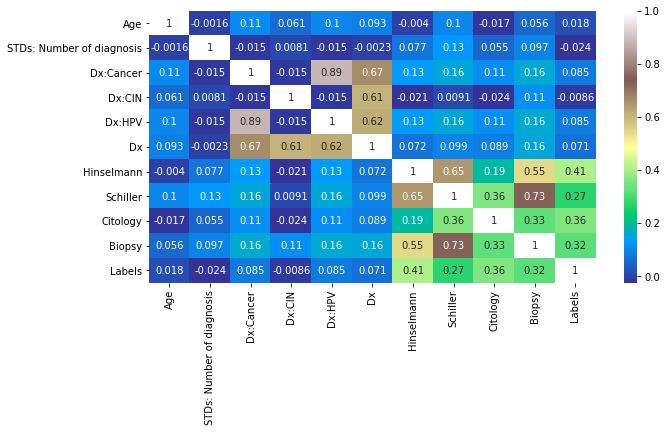

In [12]:

plt.figure(figsize=(10,5))
sns.heatmap(CCP.corr(),annot=True,cmap='terrain')

Epoch 1/200
18/18 [==============================] - 0s 9ms/step - loss: 0.0951 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.1048 - val_sparse_categorical_accuracy: 0.9857
Epoch 2/200
18/18 [==============================] - 0s 3ms/step - loss: 0.0236 - sparse_categorical_accuracy: 0.9972 - val_loss: 0.1027 - val_sparse_categorical_accuracy: 0.9857
Epoch 3/200
18/18 [==============================] - 0s 3ms/step - loss: 0.0631 - sparse_categorical_accuracy: 0.9924 - val_loss: 0.0942 - val_sparse_categorical_accuracy: 0.9857
Epoch 4/200
18/18 [==============================] - 0s 3ms/step - loss: 0.0269 - sparse_categorical_accuracy: 0.9969 - val_loss: 0.0950 - val_sparse_categorical_accuracy: 0.9857
Epoch 5/200
18/18 [==============================] - 0s 3ms/step - loss: 0.0276 - sparse_categorical_accuracy: 0.9966 - val_loss: 0.0931 - val_sparse_categorical_accuracy: 0.9857
Epoch 6/200
18/18 [==============================] - 0s 3ms/step - loss: 0.0277 - sparse_categorical_accu

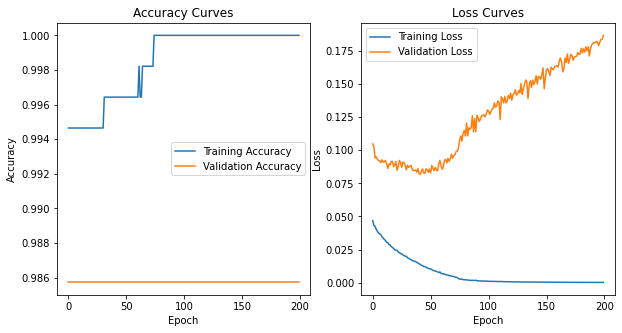

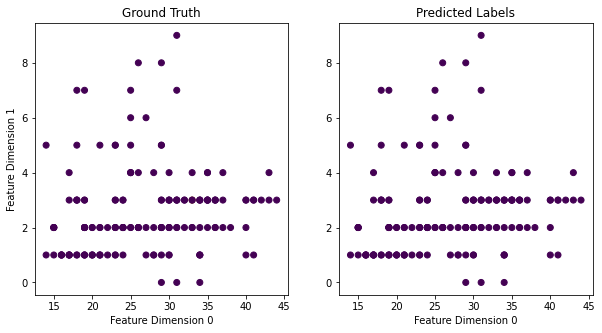

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt


model=tf.keras.Sequential(
    [
        layers.Dense(4, activation=tf.nn.relu, name="layer1"),
        layers.Dense(10, activation=tf.nn.relu, name="layer2"),
        layers.Dense(len(np.unique(y_train)),activation=tf.nn.softmax, name="layer3"),
    ]
)
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())

history=model.fit(x_train,y_train, epochs=200, validation_split=0.2, verbose=1)


plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

plt.figure(figsize=[10,5])
plt.subplot(121)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test)
plt.ylabel('Feature Dimension 1')
plt.xlabel('Feature Dimension 0')
plt.title('Ground Truth')
plt.subplot(122)
plt.title('Predicted Labels')
plt.xlabel('Feature Dimension 0')
plt.scatter(x_test[:,0], x_test[:,1], c=np.argmax(model.predict(x_test), axis=1))

plt.show()

### Using HPV infection as a label 

In [14]:
x_tr = CCP.iloc[0:700, :]
x_te = CCP.iloc[700: , :]

x_train=np.asarray(x_tr).astype('float32')
x_test=np.asarray(x_te).astype('float32')


y_train=np.array(x_tr['Dx:HPV'])
y_test=np.array(x_te['Dx:HPV'])

Epoch 1/200
18/18 [==============================] - 1s 15ms/step - loss: 7.7809 - sparse_categorical_accuracy: 0.0152 - val_loss: 6.5234 - val_sparse_categorical_accuracy: 0.0214
Epoch 2/200
18/18 [==============================] - 0s 3ms/step - loss: 5.4507 - sparse_categorical_accuracy: 0.0145 - val_loss: 4.5964 - val_sparse_categorical_accuracy: 0.0286
Epoch 3/200
18/18 [==============================] - 0s 3ms/step - loss: 3.7913 - sparse_categorical_accuracy: 0.0232 - val_loss: 3.1422 - val_sparse_categorical_accuracy: 0.0286
Epoch 4/200
18/18 [==============================] - 0s 3ms/step - loss: 2.5697 - sparse_categorical_accuracy: 0.0247 - val_loss: 2.0865 - val_sparse_categorical_accuracy: 0.0357
Epoch 5/200
18/18 [==============================] - 0s 3ms/step - loss: 1.6992 - sparse_categorical_accuracy: 0.0324 - val_loss: 1.3697 - val_sparse_categorical_accuracy: 0.0357
Epoch 6/200
18/18 [==============================] - 0s 3ms/step - loss: 1.1106 - sparse_categorical_acc

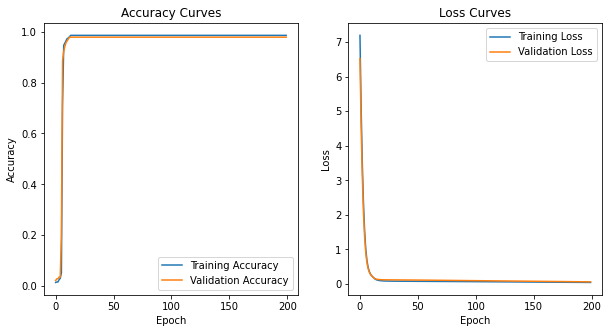

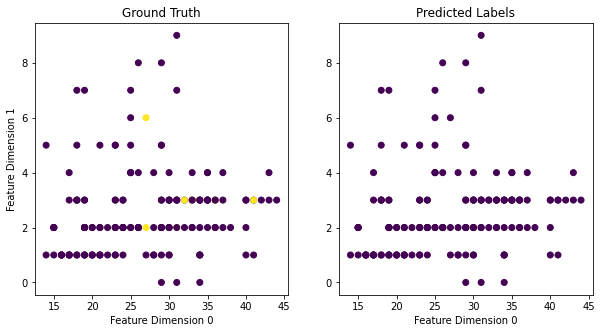

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt


model=tf.keras.Sequential(
    [
        layers.Dense(4, activation=tf.nn.relu, name="layer1"),
        layers.Dense(10, activation=tf.nn.relu, name="layer2"),
        layers.Dense(len(np.unique(y_train)),activation=tf.nn.softmax, name="layer3"),
    ]
)
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())

history=model.fit(x_train,y_train, epochs=200, validation_split=0.2, verbose=1)


plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

plt.figure(figsize=[10,5])
plt.subplot(121)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test)
plt.ylabel('Feature Dimension 1')
plt.xlabel('Feature Dimension 0')
plt.title('Ground Truth')
plt.subplot(122)
plt.title('Predicted Labels')
plt.xlabel('Feature Dimension 0')
plt.scatter(x_test[:,0], x_test[:,1], c=np.argmax(model.predict(x_test), axis=1))

plt.show()

# References

1. https://www.kaggle.com/randyrose2017/for-beginners-using-keras-to-build-models
2. https://stackoverflow.com/questions/58636087/tensorflow-valueerror-failed-to-convert-a-numpy-array-to-a-tensor-unsupporte
3. https://stackoverflow.com/questions/35043739/logical-operation-on-two-columns-of-a-dataframe
4. https://www.kaggle.com/aryansakhala/cervical-cancer-model